In [2]:
"""
A comprehensive script for running two machine learning tasks:
1. Classification of handwritten digits (MNIST) using a Fully Connected Neural Network (MLP).
2. Generation of a synthetic dataset for a house price prediction (regression) task.

This script is optimized for execution in a Jupyter Notebook environment.
"""

# --- SECTION 1: Setup and Synthetic Regression Data Generation ---
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

print("--- SECTION 1: Synthetic Data Generation (House Prediction) ---")
print("We will generate a dataset for a simulated house price prediction (regression) task, similar to the Boston Housing dataset.")

--- SECTION 1: Synthetic Data Generation (House Prediction) ---
We will generate a dataset for a simulated house price prediction (regression) task, similar to the Boston Housing dataset.


In [3]:
# Define the number of samples and features
N_SAMPLES = 1000
N_FEATURES = 5

# Generate the synthetic data
# n_features=5: Features like 'Area', 'Bedrooms', 'Age', 'Proximity to City', 'School Rating'
# n_targets=1: The target variable 'Price'
# noise: Controls the randomness in the target variable
X_reg, y_reg = make_regression(
    n_samples=N_SAMPLES,
    n_features=N_FEATURES,
    n_informative=3, # Only 3 features will strongly influence the price
    n_targets=1,
    noise=10.0,
    random_state=42
)


In [4]:
# Create a DataFrame for better visualization and understanding
feature_names = [
    'Sq_Footage_k', 'Bedrooms', 'Property_Age', 'City_Proximity', 'School_Rating'
]
df_house = pd.DataFrame(X_reg, columns=feature_names)
df_house['Price_k'] = y_reg / 1000 # Scaling target for realistic look

# Display the first few rows of the synthetic dataset
print(f"\nSuccessfully generated a synthetic house price dataset with {N_SAMPLES} samples and {N_FEATURES} features.")
print("\nFirst 5 rows of the synthetic House Prediction Dataset:")
display(df_house.head())

# Quick statistics
print("\nDescriptive statistics of the generated data:")
display(df_house.describe())



Successfully generated a synthetic house price dataset with 1000 samples and 5 features.

First 5 rows of the synthetic House Prediction Dataset:


,Sq_Footage_k,Bedrooms,Property_Age,City_Proximity,School_Rating,Price_k
0,-0.735201,1.798725,-1.095519,1.656208,-0.880754,0.065417
1,-1.613561,-1.371901,-0.172946,1.471170,1.711708,-0.027505
2,0.651391,0.954002,0.570891,-0.315269,1.135566,0.066705
3,-1.350556,-0.687014,-0.475795,-0.075871,-0.826112,-0.054404
4,1.554160,0.342338,-0.530971,0.853976,-0.335138,0.000113



Descriptive statistics of the generated data:


,Sq_Footage_k,Bedrooms,Property_Age,City_Proximity,School_Rating,Price_k
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.006531,0.004543,0.001297,0.032846,-0.017207,-0.000770
std,0.959842,1.005321,0.999219,0.988835,1.029248,0.054308
min,-3.007632,-3.241267,-3.170426,-3.176704,-2.940389,-0.168270
25%,-0.649871,-0.693862,-0.645736,-0.607606,-0.711821,-0.039419
50%,0.064768,0.022395,0.027885,-0.006855,-0.034162,0.000287
75%,0.679256,0.642029,0.649413,0.690789,0.663808,0.037741
max,3.078881,3.152057,3.926238,3.852731,3.243093,0.198626


In [5]:
# --- SECTION 2: Fully Connected Neural Network (MLP) for MNIST Classification ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

print("\n" + "="*80)
print("--- SECTION 2: MLP for MNIST Digit Classification ---")
print("We will train an MLP, experiment with activation functions (ReLU vs. Sigmoid), and explore hyperparameter tuning.")
print("="*80)



--- SECTION 2: MLP for MNIST Digit Classification ---
We will train an MLP, experiment with activation functions (ReLU vs. Sigmoid), and explore hyperparameter tuning.


In [6]:
# 1. Load and Preprocess the Data
print("\n1. Loading and Preprocessing MNIST Data...")
# Load the MNIST dataset (included in Keras)
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = tf.keras.datasets.mnist.load_data()

# Only use a subset for faster training demonstration
subset_size = 10000
X_train_subset, _, y_train_subset, _ = train_test_split(
    X_train_orig, y_train_orig, train_size=subset_size, random_state=42, stratify=y_train_orig
)
X_test = X_test_orig
y_test = y_test_orig


1. Loading and Preprocessing MNIST Data...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# Normalize the pixel data (scale to 0-1)
X_train_norm = X_train_subset.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding (10 classes: 0 to 9)
y_train_cat = to_categorical(y_train_subset, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print(f"Training Data Shape: {X_train_norm.shape} | Test Data Shape: {X_test_norm.shape}")
print(f"Number of samples used for training: {len(X_train_norm)}")

Training Data Shape: (10000, 28, 28) | Test Data Shape: (10000, 28, 28)
Number of samples used for training: 10000


In [13]:
# 2. Function to create a standard MLP model
def create_mlp_model(activation_func='relu'):
    """Creates a simple Sequential MLP model with a specified activation function."""
    model = Sequential([
        # Flatten the 28x28 image into a 784-dimensional vector
        Flatten(input_shape=(28, 28)),

        # First Hidden Layer
        Dense(256, activation=activation_func, name='hidden_1'),

        # Second Hidden Layer (for deep network demonstration)
        Dense(128, activation=activation_func, name='hidden_2'),

        # Output Layer: 10 units for 10 classes, using softmax for probabilities
        Dense(10, activation='softmax', name='output_layer')
    ])
    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [14]:
# 3. Train and Evaluate MLP Models with Different Activation Functions
print("\n3. Training and Evaluating MLP Models with Different Activation Functions...")

# --- Model with ReLU Activation ---
print("\n--- Training MLP with ReLU Activation ---")
mlp_relu = create_mlp_model(activation_func='relu')
mlp_relu.fit(
    X_train_norm,
    y_train_cat,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

loss_relu, accuracy_relu = mlp_relu.evaluate(X_test_norm, y_test_cat, verbose=0)
print(f"MLP (ReLU) Test Loss: {loss_relu:.4f}, Test Accuracy: {accuracy_relu:.4f}")

# --- Model with Sigmoid Activation ---
print("\n--- Training MLP with Sigmoid Activation ---")
mlp_sigmoid = create_mlp_model(activation_func='sigmoid')
mlp_sigmoid.fit(
    X_train_norm,
    y_train_cat,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

loss_sigmoid, accuracy_sigmoid = mlp_sigmoid.evaluate(X_test_norm, y_test_cat, verbose=0)
print(f"MLP (Sigmoid) Test Loss: {loss_sigmoid:.4f}, Test Accuracy: {accuracy_sigmoid:.4f}")

# --- Comparison ---
print("\n--- Activation Function Comparison ---")
print(f"ReLU Model Test Accuracy: {accuracy_relu:.4f}")
print(f"Sigmoid Model Test Accuracy: {accuracy_sigmoid:.4f}")
print("ReLU activation typically leads to faster training and can mitigate vanishing gradient problems, often resulting in better performance for deep networks.")


3. Training and Evaluating MLP Models with Different Activation Functions...

--- Training MLP with ReLU Activation ---
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7642 - loss: 0.8310 - val_accuracy: 0.9030 - val_loss: 0.3162
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9342 - loss: 0.2141 - val_accuracy: 0.9335 - val_loss: 0.2223
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9592 - loss: 0.1347 - val_accuracy: 0.9345 - val_loss: 0.2069
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9712 - loss: 0.0983 - val_accuracy: 0.9455 - val_loss: 0.1761
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9834 - loss: 0.0570 - val_accuracy: 0.9515 - val_loss: 0.1628
MLP (ReLU) Test Loss: 0.1463, Test Accuracy: 0.9560

--- Training MLP with Sigmoid Activation ---
Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5417 - loss: 1.6075 - val_accuracy: 0.8640 - val_loss: 0.5296
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8816 - loss: 0.4467 - val_accuracy: 0.9050 - val_loss: 0.3523
Epoch 3/5
250/250 ━━━

In [15]:
# 3. Experimenting with Activation Functions (ReLU vs. Sigmoid)

# --- Model A: ReLU Activation (Standard and generally best choice) ---
print("\n\n3a. Training Model A: ReLU Activation")
model_relu = create_mlp_model(activation_func='relu')
model_relu.summary()

history_relu = model_relu.fit(
    X_train_norm, y_train_cat,
    epochs=10,             # Hyperparameter: Number of training iterations
    batch_size=64,         # Hyperparameter: Samples per gradient update
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=0              # Suppress detailed output for cleaner notebook
)



3a. Training Model A: ReLU Activation


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_1 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Evaluate Model A
loss_relu, acc_relu = model_relu.evaluate(X_test_norm, y_test_cat, verbose=0)
print(f"Model A (ReLU) Test Accuracy: {acc_relu:.4f}")


# --- Model B: Sigmoid Activation (To show comparison) ---
print("\n3b. Training Model B: Sigmoid Activation")
model_sigmoid = create_mlp_model(activation_func='sigmoid')

history_sigmoid = model_sigmoid.fit(
    X_train_norm, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=0
)

Model A (ReLU) Test Accuracy: 0.9588

3b. Training Model B: Sigmoid Activation


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model B (Sigmoid) Test Accuracy: 0.9345

--- Activation Function Comparison ---
ReLU Accuracy: 0.9588
Sigmoid Accuracy: 0.9345
Observation: ReLU typically performs better and avoids the vanishing gradient problem seen with Sigmoid.


4. Hyperparameter Tuning Demonstration (Model C: Faster Convergence)
Training with EPOCHS=15, BATCH_SIZE=32
Model C (Tuned) Test Accuracy: 0.9533

5. Visualizing Training History (Accuracy over Epochs)


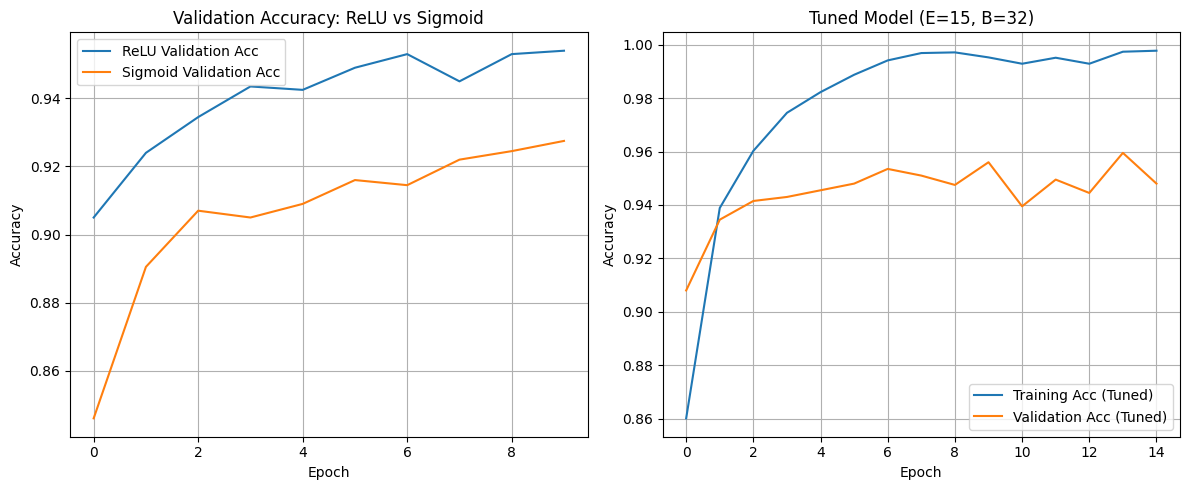


--- Summary of MNIST Classification ---
Best Accuracy Achieved (Tuned ReLU Model): 0.9533
This demonstrates a working MLP for classification, the impact of activation functions, and how to track progress for hyperparameter tuning.


In [17]:
# Evaluate Model B
loss_sigmoid, acc_sigmoid = model_sigmoid.evaluate(X_test_norm, y_test_cat, verbose=0)
print(f"Model B (Sigmoid) Test Accuracy: {acc_sigmoid:.4f}")

# Comparison
print("\n--- Activation Function Comparison ---")
print(f"ReLU Accuracy: {acc_relu:.4f}")
print(f"Sigmoid Accuracy: {acc_sigmoid:.4f}")
print("Observation: ReLU typically performs better and avoids the vanishing gradient problem seen with Sigmoid.")


# 4. Hyperparameter Tuning Demonstration (Epochs & Batch Size)

# --- Model C: Tuning (Lower Batch Size, More Epochs) ---
print("\n\n4. Hyperparameter Tuning Demonstration (Model C: Faster Convergence)")
model_tuned = create_mlp_model(activation_func='relu')

EPOCHS_TUNED = 15     # Hyperparameter: Increased epochs for more training time
BATCH_SIZE_TUNED = 32 # Hyperparameter: Smaller batch size for noisier, but potentially faster, updates

print(f"Training with EPOCHS={EPOCHS_TUNED}, BATCH_SIZE={BATCH_SIZE_TUNED}")
history_tuned = model_tuned.fit(
    X_train_norm, y_train_cat,
    epochs=EPOCHS_TUNED,
    batch_size=BATCH_SIZE_TUNED,
    validation_split=0.2,
    verbose=0
)

# Evaluate Model C
loss_tuned, acc_tuned = model_tuned.evaluate(X_test_norm, y_test_cat, verbose=0)
print(f"Model C (Tuned) Test Accuracy: {acc_tuned:.4f}")

# 5. Visualization of Training History
import matplotlib.pyplot as plt

print("\n5. Visualizing Training History (Accuracy over Epochs)")

plt.figure(figsize=(12, 5))

# Plot Accuracy for ReLU vs Sigmoid
plt.subplot(1, 2, 1)
plt.plot(history_relu.history['val_accuracy'], label='ReLU Validation Acc')
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid Validation Acc')
plt.title('Validation Accuracy: ReLU vs Sigmoid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Accuracy for Hyperparameter Tuning (Model C)
plt.subplot(1, 2, 2)
plt.plot(history_tuned.history['accuracy'], label='Training Acc (Tuned)')
plt.plot(history_tuned.history['val_accuracy'], label='Validation Acc (Tuned)')
plt.title(f'Tuned Model (E={EPOCHS_TUNED}, B={BATCH_SIZE_TUNED})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n--- Summary of MNIST Classification ---")
print(f"Best Accuracy Achieved (Tuned ReLU Model): {acc_tuned:.4f}")
print("This demonstrates a working MLP for classification, the impact of activation functions, and how to track progress for hyperparameter tuning.")